# 1. Pre-requisite
---



## Importing the Dependencies

---



In [1]:
!pip install seaborn


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import StratifiedKFold

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(7)

In [5]:
# Deprecated
# tf.logging.set_verbosity(tf.logging.INFO)

# Use the compatible version
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

## Data Collection and Analysis

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
raw_df = pd.read_csv('Healthcare-Diabetes.csv')

In [8]:
# pd.read_csv?

In [9]:
# printing the first 5 rows of the dataset
raw_df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [10]:
raw_df.shape

(2768, 10)

In [11]:
raw_df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [12]:
raw_df['Outcome'].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [13]:
raw_df.describe

<bound method NDFrame.describe of         Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
3        4            1       89             66             23       94  28.1   
4        5            0      137             40             35      168  43.1   
...    ...          ...      ...            ...            ...      ...   ...   
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30

In [14]:
raw_df.T

,0,1,2,3,4,5,6,7,8,9,...,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767
Id,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,...,2759.000,2760.00,2761.000,2762.000,2763.000,2764.00,2765.000,2766.000,2767.000,2768.000
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000,...,3.000,6.00,6.000,2.000,1.000,2.00,8.000,6.000,0.000,2.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000,...,111.000,102.00,134.000,87.000,79.000,75.00,179.000,85.000,129.000,81.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000,...,90.000,82.00,70.000,0.000,60.000,64.00,72.000,78.000,110.000,72.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000,...,12.000,0.00,23.000,23.000,42.000,24.00,42.000,0.000,46.000,15.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000,...,78.000,0.00,130.000,0.000,48.000,55.00,130.000,0.000,130.000,76.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000,...,28.400,30.80,35.400,28.900,43.500,29.70,32.700,31.200,67.100,30.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232,...,0.495,0.18,0.542,0.773,0.678,0.37,0.719,0.382,0.319,0.547
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000,...,29.000,36.00,29.000,25.000,23.000,33.00,36.000,42.000,26.000,25.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,...,0.000,1.00,1.000,0.000,0.000,0.00,1.000,0.000,1.000,0.000


In [15]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [17]:
raw_df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
raw_df.duplicated().sum()

0

In [19]:
print(raw_df.columns)

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [20]:
raw_df.drop(['Id'] , axis=1 , inplace=True)

In [21]:
raw_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


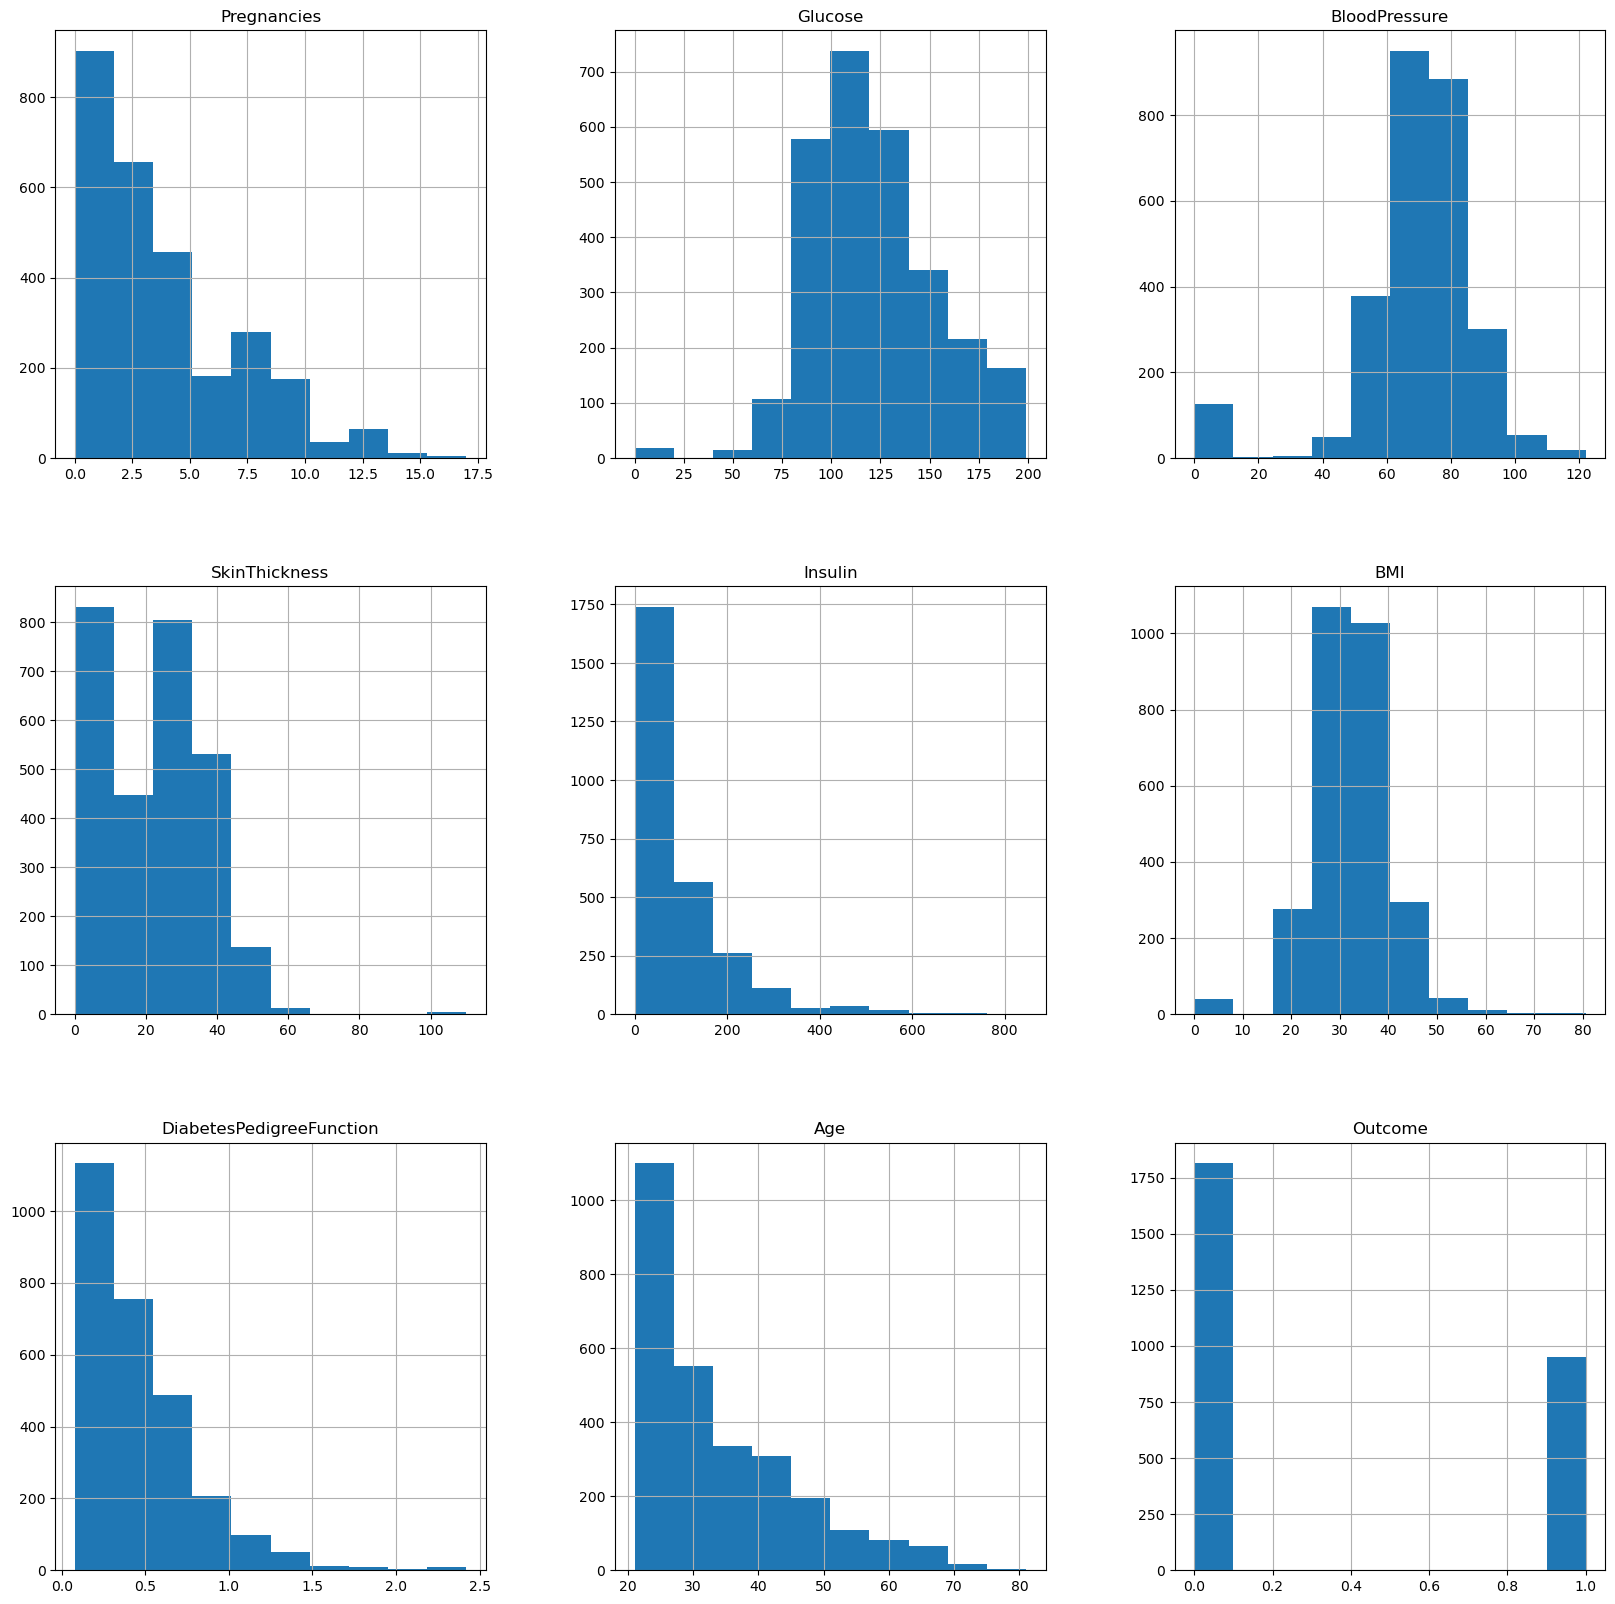

In [22]:
raw_df.hist(figsize=(20,20))
plt.show()

## Check the proportion of the class from each feature

### Baseline (Zero-R)


In [23]:
print('- Total Instatnces')
print(len(raw_df.Outcome), end='\n\n')
print('- Values and Counts of the Class')
print(raw_df.Outcome.value_counts(), end='\n\n')
print('- Zero R of the Dataset')
print(raw_df.Outcome.value_counts().max()/len(raw_df.Outcome))

- Total Instatnces
2768

- Values and Counts of the Class
Outcome
0    1816
1     952
Name: count, dtype: int64

- Zero R of the Dataset
0.6560693641618497


# 2. Naive Models and Results

- Only changes of iteration, rest are default
- Used Models are below.
1. SVM
2. Logistic Regression
3. Random Forest
4. Decision Tree
5. KNN
6. Naive Bayes(Gaussian)
7. MLP
8. AdaBoost

## Separate target and variables

In [24]:
X_df = raw_df.drop(columns=['Outcome'])
y_df = raw_df['Outcome']

## Stratified cross validation
### Train_Test---------Fold: 5
### Train-Validation---Fold: 10 (10% for validation)

In [25]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [26]:
def skfCV(X, y, model, n_splits_outer=5, n_splits_inner=10):
    best_scores = []

    # Outer Stratified K-Fold (1-fold for testing, remaining for training)
    outer_fold = StratifiedKFold(n_splits=n_splits_outer, shuffle=True)

    outer_scores = []

    for i, (train_index_outer, test_index_outer) in enumerate(outer_fold.split(X, y), start=1):
        X_train_outer, X_test_outer = X.iloc[train_index_outer, :], X.iloc[test_index_outer, :]
        y_train_outer, y_test_outer = y.iloc[train_index_outer], y.iloc[test_index_outer]

        inner_scores = []

        # Inner Stratified K-Fold (with 10% validation)
        inner_fold = StratifiedKFold(n_splits=n_splits_inner, shuffle=True)

        for j, (train_index_inner, val_index) in enumerate(inner_fold.split(X_train_outer, y_train_outer), start=1):
            X_train_inner, X_val = X_train_outer.iloc[train_index_inner, :], X_train_outer.iloc[val_index, :]
            y_train_inner, y_val = y_train_outer.iloc[train_index_inner], y_train_outer.iloc[val_index]

            # Normalize input features
            scaler = StandardScaler()
            X_train_inner_scaled = scaler.fit_transform(X_train_inner)
            X_val_scaled = scaler.transform(X_val)

            # Fit the model
            model.fit(X_train_inner_scaled, y_train_inner, epochs=150, batch_size=10, verbose=0)

            # Predict on the validation set
            y_pred_val = model.predict(X_val_scaled)
            y_pred_val = (y_pred_val > 0.5).astype(int)

            # Calculate accuracy and F1 score for each fold
            acc_fold = accuracy_score(y_val, y_pred_val)
            f1_fold = f1_score(y_val, y_pred_val)

            # Print or store accuracy and F1 score for each fold
            print(f'Fold {j}: Accuracy: {acc_fold:.4f}, F1 Score: {f1_fold:.4f}')

            inner_scores.append((acc_fold, f1_fold))

        # After the inner loop, calculate the mean accuracy and F1 score
        mean_acc_inner = np.mean([score[0] for score in inner_scores])
        mean_f1_inner = np.mean([score[1] for score in inner_scores])

        # Test on the outer test set
        X_test_outer_scaled = scaler.transform(X_test_outer)
        y_pred_test = model.predict(X_test_outer_scaled)
        y_pred_test = (y_pred_test > 0.5).astype(int)

        acc_test = accuracy_score(y_test_outer, y_pred_test)
        f1_test = f1_score(y_test_outer, y_pred_test)

        # Store the outer and inner scores for analysis
        outer_scores.append((acc_test, mean_acc_inner, f1_test, mean_f1_inner))

        # Print or store accuracy, mean accuracy, and F1 score for the outer fold
        print(f'\nTest Fold {i}: Test Accuracy: {acc_test:.4f}, Mean(train_validation) Accuracy: {mean_acc_inner:.4f}, Test F1 Score: {f1_test:.4f}, Mean(train_validation) F1 Score: {mean_f1_inner:.4f}\n')

    # After the outer loop, calculate the mean test accuracy and F1 score
    mean_acc_outer = np.mean([score[0] for score in outer_scores])
    mean_f1_outer = np.mean([score[2] for score in outer_scores])

    best_scores.append((mean_acc_outer, mean_f1_outer))

    print(f'Mean Test Accuracy: {mean_acc_outer:.4f}, Mean Test F1 Score: {mean_f1_outer:.4f}\n')

    return best_scores

In [27]:
# Assuming X_df has 8 features
model = create_model(input_dim=X_df.shape[1])

In [28]:
model_all = skfCV(X_df, y_df, model)



7/7 [==============================] - 0s 3ms/step
Fold 1: Accuracy: 0.8288, F1 Score: 0.7467
7/7 [==============================] - 0s 4ms/step
Fold 2: Accuracy: 0.9009, F1 Score: 0.8553
7/7 [==============================] - 0s 4ms/step
Fold 3: Accuracy: 0.8739, F1 Score: 0.8158
7/7 [==============================] - 0s 3ms/step
Fold 4: Accuracy: 0.9189, F1 Score: 0.8767
7/7 [==============================] - 0s 3ms/step
Fold 5: Accuracy: 0.9502, F1 Score: 0.9272
7/7 [==============================] - 0s 5ms/step
Fold 6: Accuracy: 0.9095, F1 Score: 0.8630
7/7 [==============================] - 0s 3ms/step
Fold 7: Accuracy: 0.9412, F1 Score: 0.9139
7/7 [==============================] - 1s 7ms/step
Fold 8: Accuracy: 0.9321, F1 Score: 0.9020
7/7 [==============================] - 0s 3ms/step
Fold 9: Accuracy: 0.9321, F1 Score: 0.9020
7/7 [==============================] - 0s 3ms/step
Fold 10: Accuracy: 0.9638, F1 Score: 0.9459
18/18 [==============================] - 0s 5ms/step

Tes